In [1]:
# !pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
data = pd.read_csv('Customer-Churn.csv')
data

dic = {
        ord('a'): np.array([ord('à'),ord('á'),ord('ã'),ord('â')]),
        ord('o'): np.array([ord('ó')]),
        ord('i'): np.array([ord('í')]),
        ord('e'): np.array([ord('é')]),
        ord('u'): np.array([ord('ú')])
    }

In [4]:
map = {'Sim':1,'Nao':0}
mod_data = data[['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn']].replace(map)

dummies = pd.get_dummies(data.drop(['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn'], axis=1))

final_data = pd.concat([mod_data,dummies],axis=1)

final_data

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,False,False,...,False,False,True,False,False,True,False,False,True,False
7039,1,1,1,1,0,0,72,103.20,False,False,...,False,False,True,False,False,True,True,False,False,False
7040,1,1,0,1,0,0,11,29.60,False,True,...,True,False,False,False,True,False,False,True,False,False
7041,1,0,1,1,1,1,4,74.40,False,False,...,True,False,False,False,True,False,False,False,True,False


In [5]:
pd.set_option('display.max_columns', 39)
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

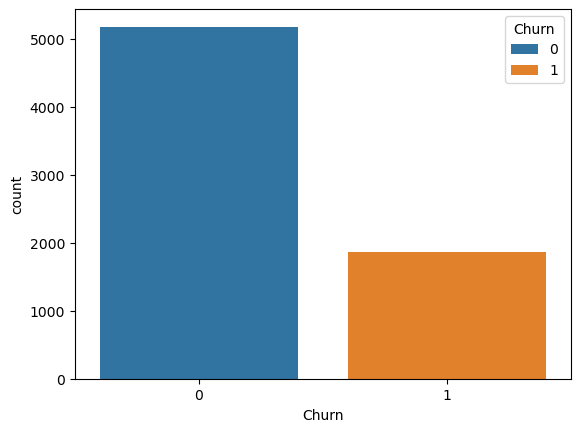

In [6]:
ax = sb.countplot(x='Churn', data=final_data, hue='Churn')

In [7]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)  

dados_final = pd.concat([X, y], axis=1) 

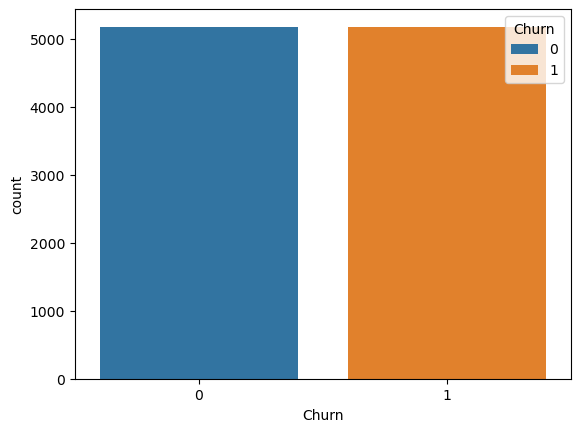

In [8]:

ax = sb.countplot(x='Churn', data=dados_final, hue='Churn')  # plotando a variável target balanceada.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
normalize = StandardScaler()

x_normalized = normalize.fit_transform(X)
df_maria = pd.DataFrame(Xmaria, columns=X.columns) #this step transforms the data related to maria like the X columns 
x_maria_nomralized = normalize.transform(df_maria)

x_maria_nomralized

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.00406703, -0.32670777, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77835396, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35149921,  0.91918014,
         2.22960721, -0.73976267, -1.27269275,  2.22960721, -0.60667885,
         1.08898545, -0.44850949, -0.84638695, -0.90389849, -0.44850949,
         1.16590099, -0.4605816 , -1.45333425,  2.11545084, -0.50820122,
        -0.94837368, -0.54712618,  1.88111576]])

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean')

In [12]:
predictions_knn = knn.predict(xtest)
predictions_knn

array([1, 0, 0, ..., 0, 1, 1])

In [13]:
from sklearn.naive_bayes import BernoulliNB

median = np.median(xtrain) # Takes the median to realize the binarizing
bnb = BernoulliNB(binarize=0.44)
bnb.fit(xtrain, ytrain)


BernoulliNB(binarize=0.44)

In [14]:

predicting_bnb = bnb.predict(xtest)
predicting_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
tree_model.feature_importances_

array([0.0181512 , 0.01497494, 0.00404973, 0.0206206 , 0.01551072,
       0.15455341, 0.20605364, 0.00861121, 0.00204014, 0.01497362,
       0.0059285 , 0.00160606, 0.        , 0.05357769, 0.        ,
       0.0165773 , 0.0107621 , 0.        , 0.00843441, 0.00804094,
       0.00043574, 0.01166525, 0.01582089, 0.        , 0.01396281,
       0.00692233, 0.        , 0.00414853, 0.00827523, 0.        ,
       0.01809795, 0.00893017, 0.23348935, 0.0280407 , 0.01590202,
       0.03529589, 0.01355288, 0.02099406])

In [20]:
predictions_tdc = tree_model.predict(xtest)
predictions_tdc

array([0, 0, 0, ..., 0, 1, 1])

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

print(confusion_matrix(ytest, predictions_knn))

[[1246  323]
 [ 262 1274]]


In [22]:
print(confusion_matrix(ytest, predicting_bnb))

[[1060  509]
 [ 209 1327]]


In [23]:
print(confusion_matrix(ytest, predictions_tdc))

[[1278  291]
 [ 274 1262]]


In [55]:
lista_matrizes = {'knn':predictions_knn,'bnb':predicting_bnb, 'tdc':predictions_tdc}

def printing_matrices(dic):
    for iten in dic:

        sum_diag = confusion_matrix(ytest, dic[iten]).diagonal().sum()
        sum_snd_diag = np.fliplr(confusion_matrix(ytest, dic[iten])).diagonal().sum()

        print('modelo {}'.format(iten))
        print('sum(True positives/negatives) = {}'.format(sum_diag))
        print('sum(False positives/negatives) = {}'.format(sum_snd_diag))
        print('-'*20)

printing_matrices(lista_matrizes)

modelo knn
sum(True positives/negatives) = 2520
sum(False positives/negatives) = 585
--------------------
modelo bnb
sum(True positives/negatives) = 2387
sum(False positives/negatives) = 718
--------------------
modelo tdc
sum(True positives/negatives) = 2540
sum(False positives/negatives) = 565
--------------------


In [69]:
def score(ytest, l_model, function):
    for iten in l_model:
        print('modelo {}'.format(iten))
        print(function(ytest, l_model[iten]))
        print('-'*20)

score(ytest, lista_matrizes, accuracy_score)

modelo knn
0.8115942028985508
--------------------
modelo bnb
0.7687600644122383
--------------------
modelo tdc
0.8180354267310789
--------------------


In [75]:
score(ytest, lista_matrizes, precision_score)

modelo knn
0.7977457733249843
--------------------
modelo bnb
0.7227668845315904
--------------------
modelo tdc
0.8126207340631036
--------------------


In [77]:
score(ytest, lista_matrizes, recall_score)

modelo knn
0.8294270833333334
--------------------
modelo bnb
0.8639322916666666
--------------------
modelo tdc
0.8216145833333334
--------------------


In [18]:
# var = (xtrain - x_maria_nomralized)**2

# lista = []
# for iten in var:
#     lista.append(np.sqrt(iten.sum()))
# lista

In [19]:
# from gen_data_analyser import MLDataAnalysis as mldata
# import numpy as np
# uri= 'Customer-Churn.csv'
# obj = mldata(uri=uri, version='portuguese')

# var = np.array(['Não','Não','não','não', 'Sim', 'sim','sim','não','sim']).tolist()

# sec = obj.replace_tilda(' '.join(var),dic).split()

# # ' '.join(sec).lower().split()

# sec

# new = obj.processing_data(tilda=False)
# #

# dummies = pd.get_dummies(new.drop(['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn'], axis=1))

# final_data = pd.concat([new[['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn']],dummies],axis=1)

# final_data
